In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Download Apple stock data from Yahoo Finance
df = yf.download('AAPL', start='2022-01-01', end='2025-01-01')

# Display first few rows
print(df.head())

C:\Users\tariq\AppData\Local\Temp\ipykernel_17636\1178106429.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645660  179.499589  174.425155  174.542932  104487900
2022-01-04  176.378357  179.558473  175.809076  179.254206   99310400
2022-01-05  171.686676  176.839632  171.411853  176.289986   94537600
2022-01-06  168.820679  172.059683  168.467333  169.507737   96904000
2022-01-07  168.987518  170.921105  167.868591  169.694211   86709100


In [4]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df['Next_Close'] = df['Close'].shift(-1)
df.dropna(inplace=True)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']
print(X.head())
print(y.head())

Price             Open        High         Low     Volume
Ticker            AAPL        AAPL        AAPL       AAPL
Date                                                     
2022-01-03  174.542932  179.499589  174.425155  104487900
2022-01-04  179.254206  179.558473  175.809076   99310400
2022-01-05  176.289986  176.839632  171.411853   94537600
2022-01-06  169.507737  172.059683  168.467333   96904000
2022-01-07  169.694211  170.921105  167.868591   86709100
Date
2022-01-03    176.378357
2022-01-04    171.686676
2022-01-05    168.820679
2022-01-06    168.987518
2022-01-07    169.007141
Name: Next_Close, dtype: float64


C:\Users\tariq\AppData\Local\Temp\ipykernel_17636\1358277408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Next_Close'] = df['Close'].shift(-1)
C:\Users\tariq\AppData\Local\Temp\ipykernel_17636\1358277408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 13.92


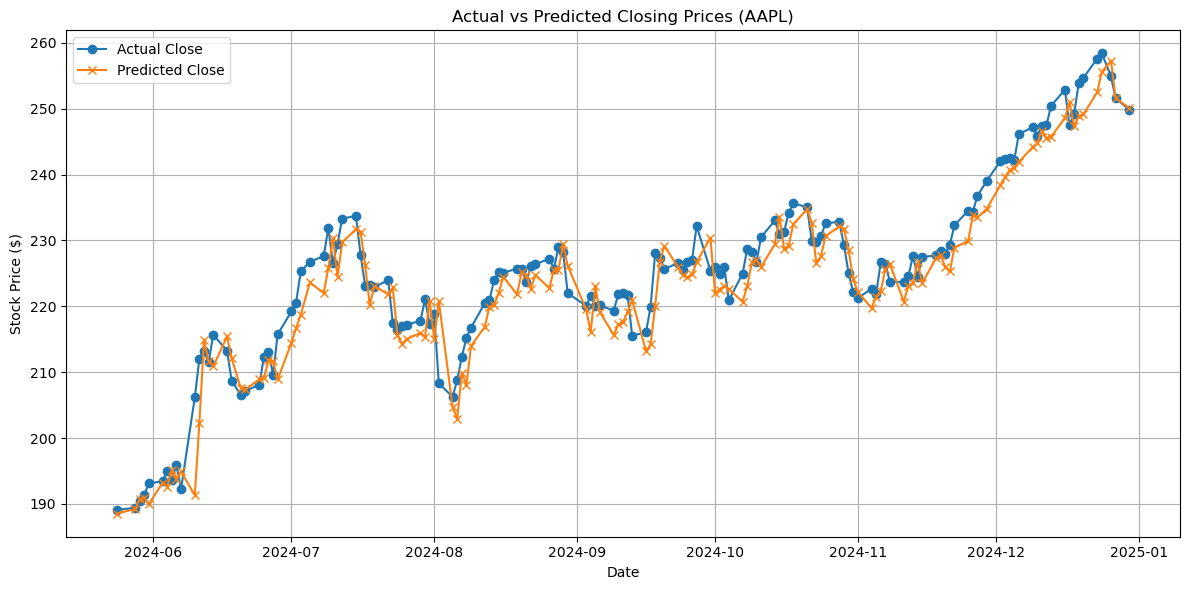

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label="Actual Close", marker='o')
plt.plot(y_test.index, y_pred, label="Predicted Close", marker='x')
plt.title("Actual vs Predicted Closing Prices (AAPL)")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()